In [1]:
# For reading the data
import pandas as pd
import os
import numpy as np
import math

from datetime import datetime
from dateutil import tz

# General plotting commands
from matplotlib.path import Path
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

# pip install numpy --upgradea
import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen
from cartopy.io.img_tiles import GoogleTiles

In [2]:
df = pd.read_csv("~/data/gps1.csv") #load_GPS_directory_to_pandas('.')
df


,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.status.status,field.status.service,field.latitude,field.longitude,field.altitude,field.position_covariance0,field.position_covariance1,field.position_covariance2,field.position_covariance3,field.position_covariance4,field.position_covariance5,field.position_covariance6,field.position_covariance7,field.position_covariance8,field.position_covariance_type
0,1595957763871611082,287,1595957754200379110,gps_base,0,7,39.676553,-119.820786,1481.621,15.233409,0.0,0.0,0.0,15.233409,0.0,0.0,0.0,47.306884,2
1,1595957764068086102,288,1595957754400379057,gps_base,0,7,39.676552,-119.820786,1481.641,15.272464,0.0,0.0,0.0,15.272464,0.0,0.0,0.0,47.430769,2
2,1595957764269815647,289,1595957754600379004,gps_base,0,7,39.676552,-119.820786,1481.648,15.311569,0.0,0.0,0.0,15.311569,0.0,0.0,0.0,47.582404,2
3,1595957764469137873,290,1595957754800378951,gps_base,0,7,39.676552,-119.820786,1481.647,15.350724,0.0,0.0,0.0,15.350724,0.0,0.0,0.0,47.720464,2
4,1595957764672790677,291,1595957755000378898,gps_base,0,7,39.676552,-119.820786,1481.637,15.397776,0.0,0.0,0.0,15.397776,0.0,0.0,0.0,47.872561,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,1595958562285731210,4027,1595958552600172987,gps_base,0,7,39.676575,-119.820773,1480.416,1.089936,0.0,0.0,0.0,1.089936,0.0,0.0,0.0,3.161284,2
3741,1595958562484777732,4028,1595958552800172934,gps_base,0,7,39.676575,-119.820773,1480.461,1.073296,0.0,0.0,0.0,1.073296,0.0,0.0,0.0,3.125824,2
3742,1595958562690753830,4029,1595958553000172881,gps_base,0,7,39.676575,-119.820774,1480.519,1.054729,0.0,0.0,0.0,1.054729,0.0,0.0,0.0,3.094081,2
3743,1595958562886590436,4030,1595958553200172829,gps_base,0,7,39.676575,-119.820774,1480.559,1.040400,0.0,0.0,0.0,1.040400,0.0,0.0,0.0,3.059001,2


Text(0, 0.5, 'Latitude')

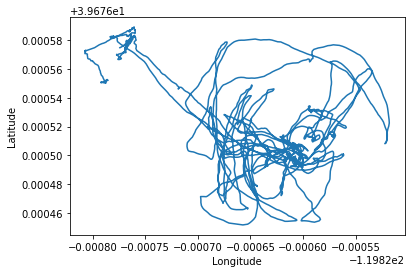

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(df["field.longitude"], df["field.latitude"])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [4]:
mean_latitude = df["field.longitude"].mean()
mean_longitude= df["field.latitude"].mean()
minValueLong = df["field.longitude"].min()
maxValueLong = df["field.longitude"].max()
minValueLat = df["field.latitude"].min()
maxValueLat = df["field.latitude"].max()
print("meanLatitude:%.6f" %mean_latitude)
print("meanLongitude:%.6f" %mean_longitude)
print("minvaluelong:%.6f" %minValueLong)
print("maxvaluelong:%.6f" %maxValueLong)
print("minvaluelat:%.6f" %minValueLat)
print("maxvaluelat:%.6f" %maxValueLat)

meanLatitude:-119.820656
meanLongitude:39.676525
minvaluelong:-119.820807
maxvaluelong:-119.820518
minvaluelat:39.676452
maxvaluelat:39.676589


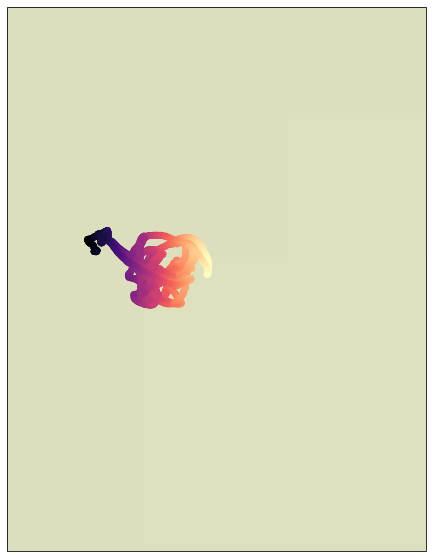

In [5]:
# Terrain Tiles from Stamen

# Define image tiles
tiler = Stamen('terrain')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.8200, -119.8210, 39.6760, 39.6770],crs=ccrs.PlateCarree())

# Download images with resolution
resolution =12
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df["field.longitude"], df["field.latitude"], c= df["field.longitude"], cmap='magma', transform=ccrs.PlateCarree())

In [ ]:
# Satellite Tiles from Google

# Define image tiles
tiler = GoogleTiles(style='satellite')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.8204, 39.6760, -119.8208, 39.6770],crs=ccrs.PlateCarree())

# Download images with resolution
resolution = 18
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df["field.longitude"], df["field.latitude"], c=df["field.longitude"], cmap='magma', transform=ccrs.Geodetic())

In [ ]:
# Street Tiles from Google

# Define image tiles
tiler = GoogleTiles(style='street')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.82060, -119.8208, 39.67650, 39.67690], crs=ccrs.PlateCarree())

# Download images with resolution
resolution = 18
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df["field.longitude"], df["field.latitude"], c=df["field.longitude"], cmap='magma', transform=ccrs.Geodetic())

### Measuring Distance

In [14]:
def calculate_dst(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 * 1000 # meters

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) **2 + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) **2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [17]:
#10cm
lat1 = 39.5394048; lat2 = 39.5394114; long1 = -119.8130651; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

1.2779171005367047


In [18]:
from geopy import distance

coords_1 = (39.5394048, -119.8130651)
coords_2 = (39.5394114, -119.8130529)

print (distance.distance(coords_1, coords_2).m)

1.279403210844257


In [19]:
#5cm
lat1 = 39.5394067; lat2 = 39.5394074; long1 = -119.8130486; long2 = -119.8130529
print(calculate_dst((lat1, long1), (lat2, long2)) )

0.37685967028107026


In [21]:
#2cm
lat1 = 39.5394021; lat2 = 39.5394045; long1 = -119.813052; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

0.2778033568972474


In [22]:
#1cm
lat1 = 39.5393945; lat2 = 39.539392; long1 = -119.8130723; long2 = -119.8130765
print( calculate_dst((lat1, long1), (lat2, long2)) )

0.4549629571360745


In [23]:
from geopy import distance

coords_1 = (39.54644600, -119.81473767)
coords_2 = (39.54646483, -119.81476417)

print (distance.distance(coords_1, coords_2).m)

3.0918001715150227


In [25]:
lat1 = 39.54644600; lat2 = 39.54646483; long1 = -119.81473767; long2 = -119.81476417
print( calculate_dst((lat1, long1), (lat2, long2)) )

3.089804096509921


The great-circle distance or orthodromic distance is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere (as opposed to a straight line through the sphere's interior). The distance between two points in Euclidean space is the length of a straight line between them, but on the sphere there are no straight lines. In spaces with curvature, straight lines are replaced by geodesics. Geodesics on the sphere are circles on the sphere whose centers coincide with the center of the sphere, and are called great circles : https://en.wikipedia.org/wiki/Great-circle_distance

In [26]:
#12.7cm
from geopy import distance
coords_1 = (39.54644600, -119.81473767)
coords_2 = (39.54646483, -119.81476417)

print (distance.geodesic(coords_1, coords_2).meters)

3.0918001715150227


In [27]:
#2inches ; 5cm
from geopy import distance
coords_1 = (39.5470989, -119.8155829)
coords_2 = (39.5470978, -119.8155816)

print (distance.geodesic(coords_1, coords_2).meters)

0.16553440776179112


In [28]:
#1 feet ; 0.3048 meters ; 30.48cm

from geopy import distance
coords_1 = (39.5471612, -119.8156324)
coords_2 = (39.5471634, -119.8156305)

print (distance.geodesic(coords_1, coords_2).meters)

0.2938252982147817


In [29]:
#4 feet; 1.2192 meters ; 121.92
from geopy import distance
coords_1 = (39.547167, -119.8156188)
coords_2 = (39.5471606, -119.8156317)

print (distance.geodesic(coords_1, coords_2).meters)

1.3169632272097933


In [30]:
#3 inches ; 0.0762 meters; 7.62cm

from geopy import distance
coords_1 = (39.5471637, -119.8156282)
coords_2 = (39.547164, -119.8156271)

print (distance.geodesic(coords_1, coords_2).meters)

0.10024599311443443


In [31]:
#5 inches; 0.127 meters; 12.7 cm

from geopy import distance
coords_1 = (39.547163, -119.8156307)
coords_2 = (39.5471638, -119.8156288)

print (distance.geodesic(coords_1, coords_2).meters)

0.18590565457263297
